<a href="https://colab.research.google.com/github/AlkaidCheng/GSOC_MLHEP/blob/master/Exercise/TaskII/QMLHEP_Exercise_Quantum_Computing_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QMLHEP Exercise Quantum Computing Part

* Install `cirq` library

In [1]:
!pip install cirq

     |████████████████████████████████| 1.2MB 4.8MB/s 
     |████████████████████████████████| 5.3MB 25.7MB/s 
     |████████████████████████████████| 1.2MB 49.4MB/s 
     |████████████████████████████████| 1.8MB 49.9MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556408 sha256=47ddaca2b95138d575b4d7a9c91b27931f55510f7287cb39b3958397f69b9d9f
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1
  Found existing installation: protobuf 3.10.0
    Uninstalling protobuf-3.10.0:
      Successfully uninstalled protobuf-3.10.0
  Found existing installation: networkx 2.4
    Uninstalling networkx-2.4:
      Successfully uninstalled networkx-2.4


### Task I - Implement a simple quantum operation with Cirq

* Importing libraries

In [0]:
import cirq
from cirq.ops import H, CNOT, SWAP,rx, measure
import numpy as np
from cirq.circuits import InsertStrategy

* Preparing the qubits

In [0]:
# Create a circuit with 5 qubits
q0, q1, q2, q3, q4 = [cirq.GridQubit(i, 0) for i in range(5)]

* Constructing the circuit

In [0]:
circuit = cirq.Circuit()
# Apply Hadamard operation on every qubit
circuit.append([H(q0),H(q1),H(q2),H(q3),H(q4)], strategy=InsertStrategy.NEW_THEN_INLINE)
# Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
circuit.append([CNOT(q0,q1),CNOT(q1,q2),CNOT(q2,q3),CNOT(q3,q4)])
# SWAP (0, 4)
circuit.append([SWAP(q0,q4)], strategy=InsertStrategy.NEW_THEN_INLINE)
# Rotate every qubit abouot the x axis by pi/2
circuit.append([rx(np.pi/2)(q0),rx(np.pi/2)(q1),rx(np.pi/2)(q2),rx(np.pi/2)(q3),rx(np.pi/2)(q4)], strategy=InsertStrategy.NEW_THEN_INLINE)

* Visualizing the circuit

In [7]:
print(circuit)

(0, 0): ───H───@───────────────×───Rx(0.5π)───
               │               │
(1, 0): ───H───X───@───────────┼───Rx(0.5π)───
                   │           │
(2, 0): ───H───────X───@───────┼───Rx(0.5π)───
                       │       │
(3, 0): ───H───────────X───@───┼───Rx(0.5π)───
                           │   │
(4, 0): ───H───────────────X───×───Rx(0.5π)───


### Task II - Quantum Qubit Measurement

In [0]:
trials = 1000
Rx_theta = np.linspace(0,2*np.pi,500)
proba_0_state = []
for theta in Rx_theta:
  # create a circuit
  circuit = cirq.Circuit()
  # apply Rx rotation by theta to the first qubit
  circuit.append([rx(theta)(q0)])
  # measure the qubit
  circuit.append([measure(q0, key = 'm')])
  simulator = cirq.Simulator()
  # do the measurements for `trials` times
  result = simulator.run(circuit, repetitions=trials).measurements['m']
  # count the number of times the qubit is in the 0 and 1 states
  N_state_1 = np.count_nonzero(result)
  N_state_0 = trials - N_state_1
  proba = N_state_0/trials
  proba_0_state.append(proba)

Text(0.5, 1.0, 'Qubit Measurement')

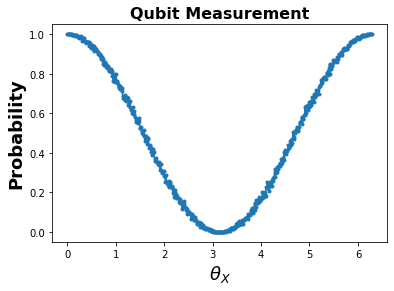

In [22]:
import matplotlib.pyplot as plt
plt.plot(Rx_theta,proba_0_state,'.-')
plt.xlabel(r"$\theta_X$", fontsize = 18, fontweight = 'bold')
plt.ylabel(r"Probability", fontsize = 18, fontweight = 'bold')
plt.title("Qubit Measurement", fontsize = 16, fontweight = 'bold')